![bmw_logo](BMW-Logo-2020-present.jpg)

In [29]:
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

In [30]:
df = pd.read_csv(
    filepath_or_buffer="bmw.csv"
)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


### 🚗 SECTION 1 — Price Landscape & Distribution

#### Overall Price Distribution

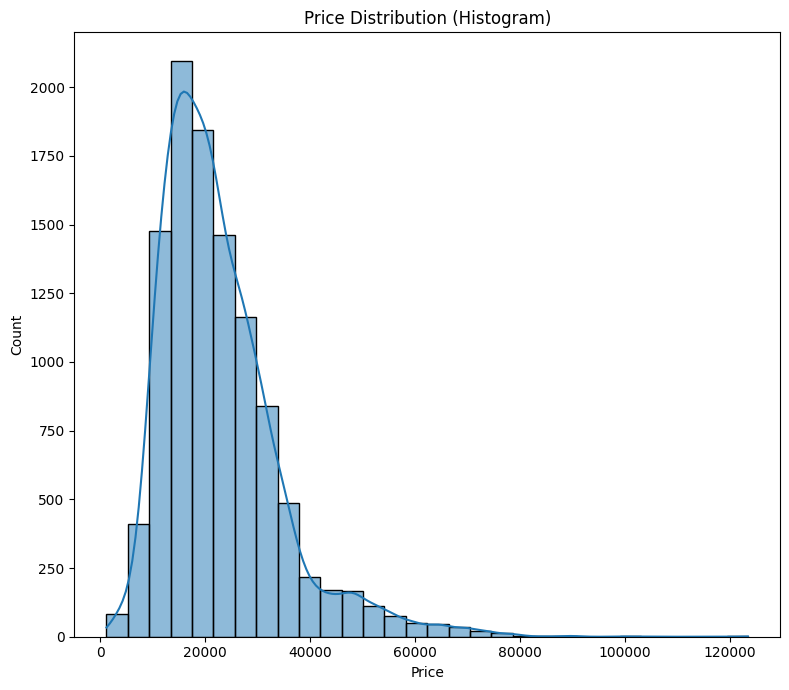

In [32]:
title = "Distribution of Price"

plt.figure(figsize=(8, 7))

sns.histplot(
    df["price"],
    bins=30,
    kde=True
)

plt.title("Price Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("Price")

plt.tight_layout()

filename = "figures/price_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Year

In [33]:
stats = (
    df
    .groupby(by="year")
    .agg(mean_price=("price", "mean"))
    .reset_index()
)

In [34]:
stats

,year,mean_price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3285.000000
4,2000,1624.500000
5,2001,7333.333333
6,2002,5486.500000
7,2003,9222.500000
8,2004,8213.166667
9,2005,5390.166667


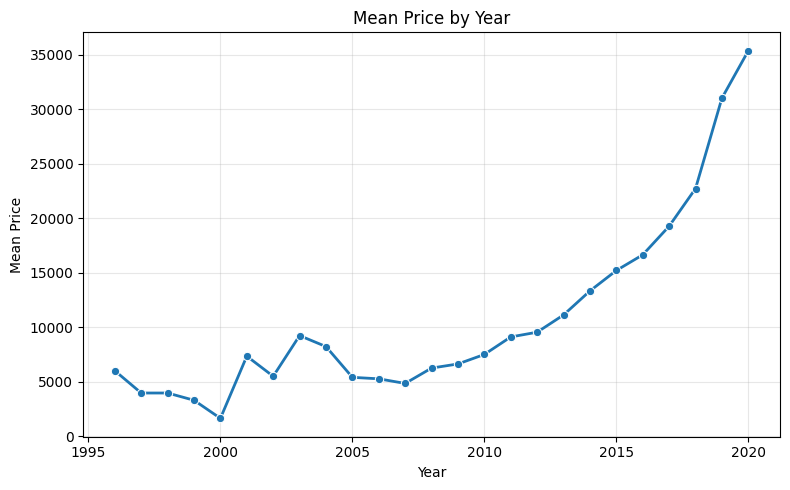

In [35]:
title = "Mean Price by Year"

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=stats,
    x="year",
    y="mean_price",
    marker="o",
    linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/mean_price_by_year.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Transmission Type

In [36]:
df["transmission"].value_counts()

transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64

In [37]:
manual = df[df["transmission"] == "Manual"]
automatic = df[df["transmission"] == "Automatic"]
semi_auto = df[df["transmission"] == "Semi-Auto"] 

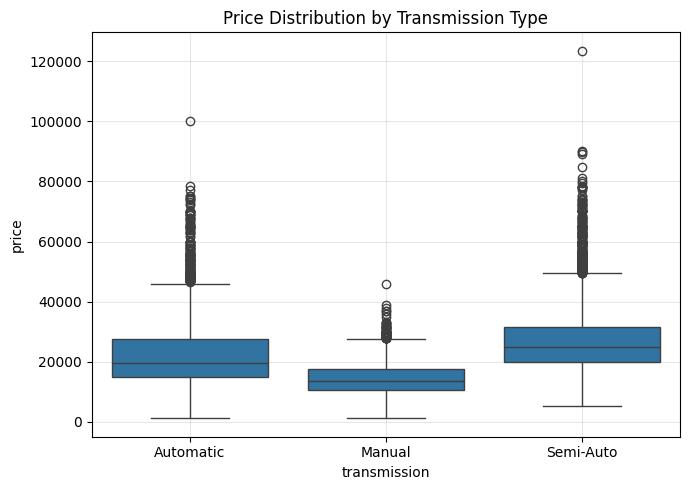

In [41]:
title = "Price Distribution by Transmission Type"

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="transmission",
    y="price"
)

plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/{price_distribution_by_transmission_type}.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


### 🏎️ SECTION 2 — Mileage, Age & Depreciation Effects

#### 💾 Saving Plots

In [39]:
source = "source: https://www.kaggle.com/datasets/thedrzee/bmw-carsdataset\n"

with open("README.md", "w+") as readme:
    readme.write(source)

In [40]:
all_plots = os.listdir("figures")
print(all_plots)

with open("README.md", "a") as readme:    
    for plot in all_plots:
        if plot.endswith(".png"):
            description = (
                plot
                .replace(".png", "")
                .replace("_", " ")
                .capitalize()
            )
            readme.write(f"\n{description}\n")

            new_line = f"![{plot.replace('.png', '')}](figures/{plot})\n"
            readme.write(new_line)


['mean_price_by_year.png', 'price_by_transmission_boxplot.png', 'price_distribution.png', '{price_distribution_by_transmission_type}.png']
